In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [65]:
def ret_gray(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale

In [66]:
def ret_edges(gray):
    return cv2.Canny(gray, 60, 95, apertureSize=3) # detect edges


In [67]:
def ret_lines(edges):
        return cv2.HoughLinesP(
                        edges,
                        1,
                        np.pi/360,
                        250,
                        minLineLength=120,
                        maxLineGap=10,
                ) # detect lines

In [68]:
def get_lines(img, lines):
    equations = {}
    for line in lines:
        x1, y1, x2, y2 = line[0]
        slope = (y2-y1) / (x2 - x1)
        y_intercept = y2 - x2*slope
        
        pair = (slope, y_intercept)
        to_be_popped = []
        avg_slope = pair[0]
        avg_intercept = pair[1]
        identical_counter = 1
        for pairing in equations:
            if abs(min(pairing[0], pair[0])/max(pairing[0], pair[0])) > 0.95 and abs(min(pairing[1], pair[1])/max(pairing[1], pair[1])) > 0.95:
                avg_slope+=(pairing[0])
                avg_intercept+=(pairing[1])
                identical_counter+=1
                to_be_popped.append(pairing)
        
        for removal in to_be_popped:
            equations.pop(removal)
        equations[(avg_slope / identical_counter, avg_intercept / identical_counter)] = (x1,y1)

        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        to_be_popped.clear()
    return equations


In [69]:
def draw_lines(img, equations):
    for line in equations:
        slope = line[0]
        x1 = equations[line][0]
        y1 = equations[line][1]
        cv2.putText(img, str(slope), (x1,y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    plt.imshow(img)
    plt.show()



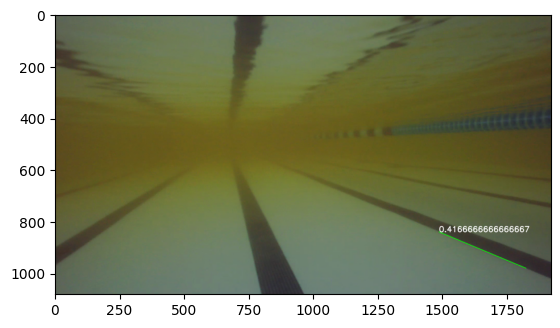

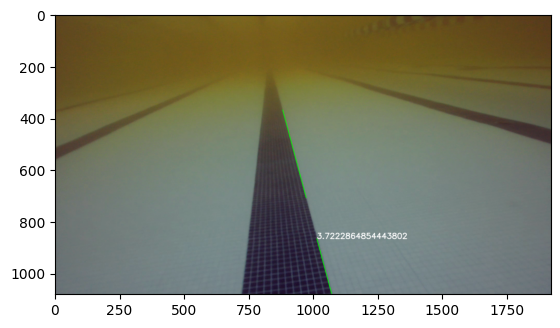

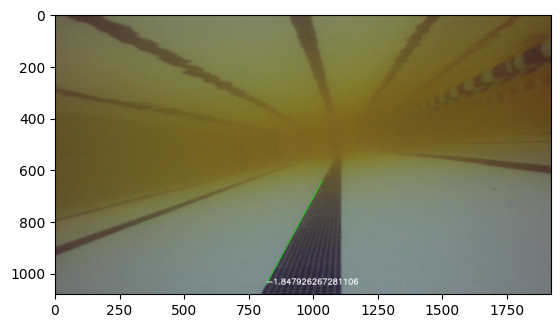

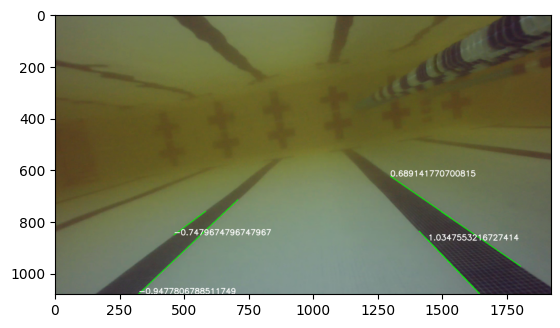

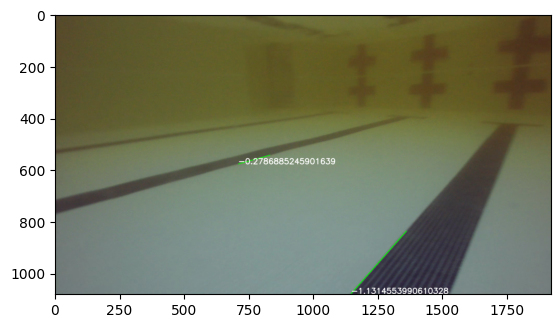

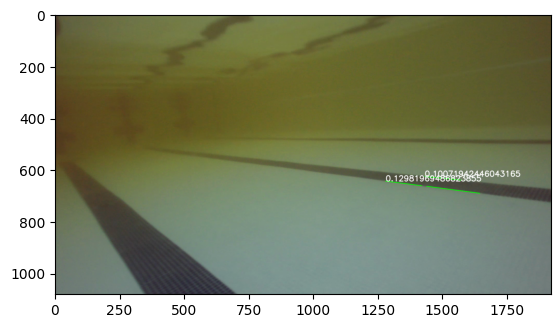

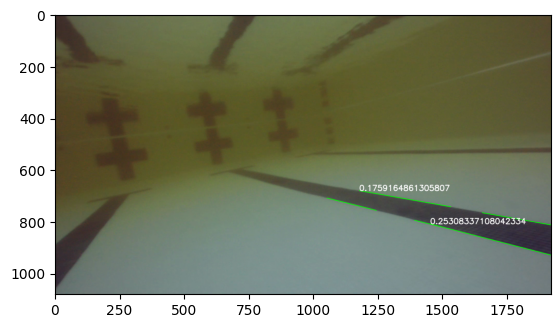

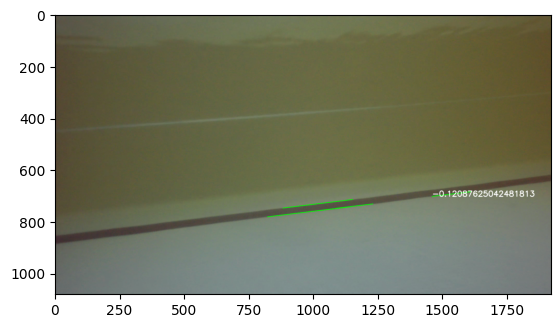

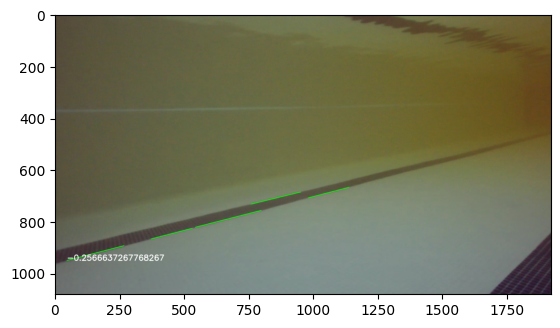

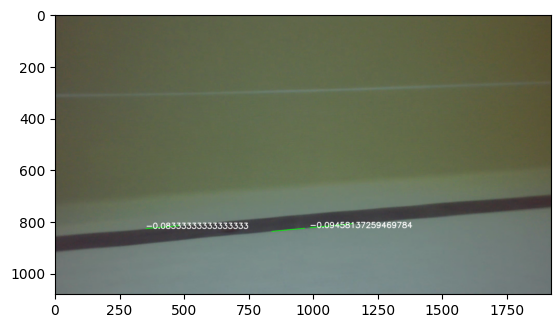

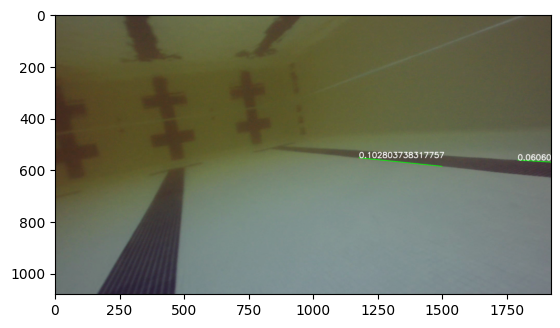

KeyboardInterrupt: 

In [70]:
vid = cv2.VideoCapture('AUV_Vid1.mkv')
ret, img = vid.read()
frequency = 100
count = 0
while ret:
    if count%frequency == 0:
        gray = ret_gray(img)
        edges = ret_edges(gray)
        lines = ret_lines(edges)
        if (lines is None) or len(lines) == 0:
            count += 1
            ret, img = vid.read()
            continue
        equations = get_lines(img, lines)
        draw_lines(img, equations)
    count += 1
    ret, img = vid.read()

In [ ]:
# from dt_apriltags import Detector

In [ ]:
# img = cv2.imread('test_image.png', cv2.IMREAD_GRAYSCALE)
# at_detector = Detector(families='tag36h11',
#                        nthreads=1,
#                        quad_decimate=1.0,
#                        quad_sigma=0.0,
#                        refine_edges=1,
#                        decode_sharpening=0.25,
#                        debug=0)

In [ ]:
# tags = at_detector.detect(img, estimate_tag_pose=False, camera_params=None, tag_size=None)

# color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

# for tag in tags:
#     for idx in range(len(tag.corners)):
#         cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))

#     cv2.putText(color_img, str(tag.tag_id),
#                 org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
#                 fontFace=cv2.FONT_HERSHEY_SIMPLEX,
#                 fontScale=0.8,
#                 color=(0, 0, 255))
    

# plt.imshow(color_img)